In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [21]:
pd.options.display.float_format = "{:,.1f}".format

In [2]:
split_sizes = [2,4,8,16,32,64]

Want a dataframe with columns:

method | model | dataset | num_samples | measure | score | std

## Base models

In [62]:
dfs = []

method_to_model = {"SetFit": "setfit/paraphrase-mpnet-base-v2", "DistilBERT": "transformers/distilbert-base-uncased"}

for method, model_name in method_to_model.items():
    results_path = Path("../results/") / model_name

    for dataset in results_path.glob("*"):
        for split in dataset.glob("*"):
            if (split/"results.json").is_file():
                df = pd.read_json(split/"results.json", lines=True)
            else:
                continue
            parts = split.parts
            if parts[-1] == "train-full":
                continue
            df["method"] = parts[-4]
            df["model"] = parts[-3]
            df["dataset"] = parts[-2]
            df["num_samples"] = int(parts[-1].split("-")[-2])
            dfs.append(df)
        
results_df = pd.concat(dfs).reset_index(drop=True)
results_df.head()

,measure,score,method,model,dataset,num_samples
0,accuracy,90.3,setfit,paraphrase-mpnet-base-v2,SentEval-CR,16
1,accuracy,89.0,setfit,paraphrase-mpnet-base-v2,SentEval-CR,16
2,accuracy,89.9,setfit,paraphrase-mpnet-base-v2,SentEval-CR,16
3,accuracy,89.8,setfit,paraphrase-mpnet-base-v2,SentEval-CR,16
4,accuracy,90.7,setfit,paraphrase-mpnet-base-v2,SentEval-CR,32


In [63]:
results_df["method"].value_counts()

setfit          300
transformers    300
Name: method, dtype: int64

## Aggregate

In [64]:
agg_df = results_df.groupby(["method", "dataset", "num_samples"]).agg({"score":[np.mean,np.std]}).reset_index()
agg_df.columns = ['_'.join(column) for column in agg_df.columns.to_flat_index()]
agg_df.head()

,method_,dataset_,num_samples_,score_mean,score_std
0,setfit,SentEval-CR,2,76.6,9.9
1,setfit,SentEval-CR,4,81.5,9.9
2,setfit,SentEval-CR,8,88.5,2.0
3,setfit,SentEval-CR,16,89.0,1.1
4,setfit,SentEval-CR,32,90.0,0.8


In [65]:
pd.options.display.float_format = "{:,.1f}".format


In [66]:
agg_df.query("method_ == 'transformers'").groupby(["num_samples_"]).mean()

,score_mean,score_std
num_samples_,,
2,28.0,4.3
4,35.8,4.9
8,42.1,4.8
16,50.6,5.4
32,61.0,3.7
64,67.6,2.6


In [68]:
agg_df.query("method_ == 'setfit'")

,method_,dataset_,num_samples_,score_mean,score_std
0,setfit,SentEval-CR,2,76.6,9.9
1,setfit,SentEval-CR,4,81.5,9.9
2,setfit,SentEval-CR,8,88.5,2.0
3,setfit,SentEval-CR,16,89.0,1.1
4,setfit,SentEval-CR,32,90.0,0.8
5,setfit,SentEval-CR,64,90.4,0.6
6,setfit,ag_news,2,64.6,5.8
7,setfit,ag_news,4,77.3,3.1
8,setfit,ag_news,8,82.9,2.9
9,setfit,ag_news,16,85.0,1.8


## Full results

In [46]:
dfs = []

method_to_model = {"DistilBERT": "transformers/distilbert-base-uncased"}

for method, model_name in method_to_model.items():
    results_path = Path("../results/") / model_name

    for dataset in results_path.glob("*"):
        for split in dataset.glob("*"):
            if (split/"results.json").is_file():
                df = pd.read_json(split/"results.json", lines=True)
            else:
                continue
            parts = split.parts
            if parts[-1] != "train-full":
                continue
            df["method"] = parts[-4]
            df["model"] = parts[-3]
            df["dataset"] = parts[-2]
            dfs.append(df)
        
full_results_df = pd.concat(dfs).reset_index(drop=True)
full_results_df.head()

,score,measure,method,model,dataset
0,89.2,accuracy,transformers,distilbert-base-uncased,SentEval-CR
1,50.5,accuracy,transformers,distilbert-base-uncased,sst5
2,93.4,accuracy,transformers,distilbert-base-uncased,ag_news
3,79.0,matthews_correlation,transformers,distilbert-base-uncased,amazon_counterfactual_en
4,93.1,accuracy,transformers,distilbert-base-uncased,emotion


In [47]:
full_results_df["score"].mean()

81.05217870551841

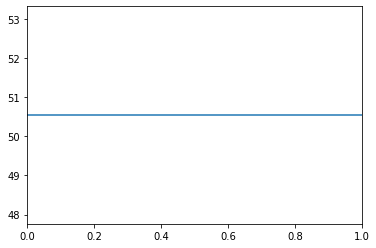

In [51]:
plt.axhline(full_results_df.query("dataset == 'sst5'")["score"].values)

## Single dataset plot

In [39]:
dataset_name = "sst5"

tmp_df = agg_df.query(f"dataset_ == '{dataset_name}'")
tmp_df

,method_,dataset_,num_samples_,score_mean,score_std
24,setfit,sst5,2,34.0,2.9
25,setfit,sst5,4,38.8,3.2
26,setfit,sst5,8,43.6,3.1
27,setfit,sst5,16,47.0,1.8
28,setfit,sst5,32,49.5,1.4
29,setfit,sst5,64,51.9,0.7
54,transformers,sst5,2,26.2,4.0
55,transformers,sst5,4,24.1,3.1
56,transformers,sst5,8,31.9,2.3
57,transformers,sst5,16,33.8,2.1


In [40]:
def plot_method(df, method):
    m_df = df.query(f"method_ == '{method}'")
    x = m_df["num_samples_"]
    y = m_df["score_mean"]
    ci = m_df["score_std"]
    plt.plot(x, y, label=method, marker='o')
    plt.fill_between(x, (y-ci), (y+ci), alpha=0.2)

In [71]:
def plot_dataset(dataset_name):
    tmp_df = agg_df.query(f"dataset_ == '{dataset_name}'")
    fig, ax = plt.subplots(figsize=(6,6))
    plot_method(tmp_df, "setfit")
    # plot_method(tmp_df, "adapet")
    plot_method(tmp_df, "transformers")
    plt.axhline(full_results_df.query(f"dataset == '{dataset_name}'")["score"].values, color='r', linestyle="--", label="full")
    plt.xlabel("Number of labeled samples per class")
    plt.ylabel("Score")
    plt.title(dataset_name)
    plt.legend(loc="lower right")
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.tight_layout()

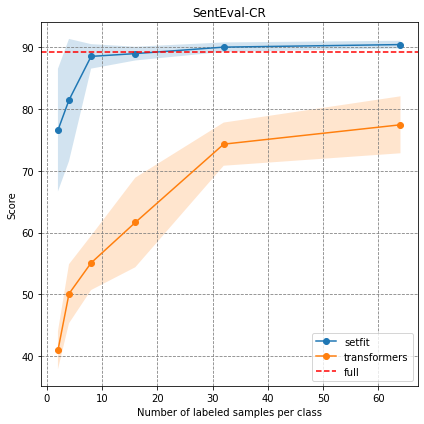

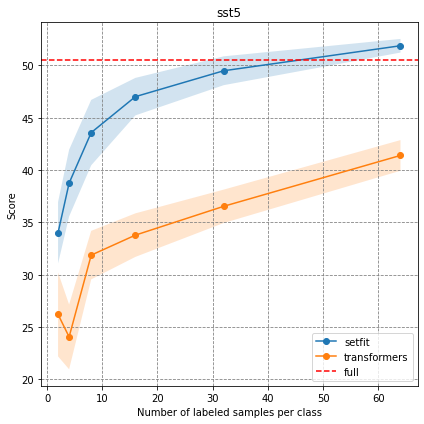

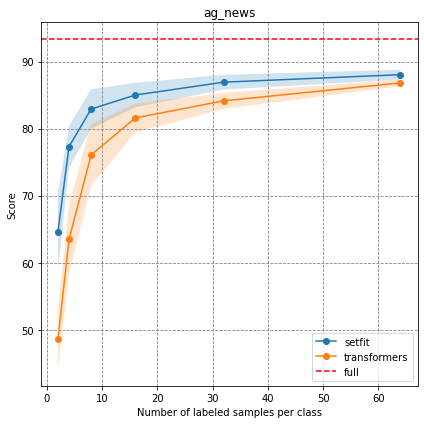

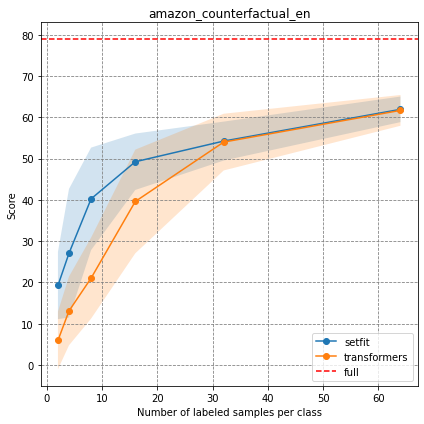

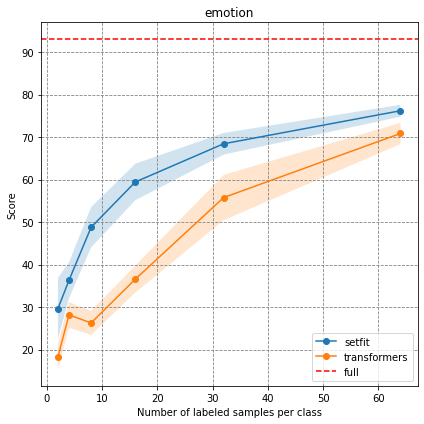

In [72]:
for dataset in results_df["dataset"].unique():
    plot_dataset(dataset)

## Multilingual

In [17]:
dfs = []

method_to_model = {"SetFit": "setfit/paraphrase-multilingual-mpnet-base-v2", "XLM-R": "transformers/xlm-roberta-base"}

for method, model_name in method_to_model.items():
    results_path = Path("../final_results/") / model_name

    for dataset in results_path.glob("*"):
        for mode in dataset.glob("*"):
            for split in mode.glob("*"):
                if (split/"results.json").is_file():
                    df = pd.read_json(split/"results.json", lines=True)
                else:
                    continue
                parts = split.parts
                if parts[-1] == "train-full":
                    continue
                df["method"] = parts[-5]
                df["model"] = parts[-4]
                df["dataset"] = parts[-3]
                df["num_samples"] = int(parts[-1].split("-")[-2])
                df["train_mode"] = parts[-2]
                dfs.append(df)

results_df = pd.concat(dfs).reset_index(drop=True)
results_df.head()

,measure,score,method,model,dataset,num_samples,train_mode
0,mae,96.42,setfit,paraphrase-multilingual-mpnet-base-v2,amazon_reviews_multi_zh,8,each
1,mae,95.76,setfit,paraphrase-multilingual-mpnet-base-v2,amazon_reviews_multi_zh,8,each
2,mae,99.20,setfit,paraphrase-multilingual-mpnet-base-v2,amazon_reviews_multi_zh,8,each
3,mae,93.70,setfit,paraphrase-multilingual-mpnet-base-v2,amazon_reviews_multi_zh,8,each
4,mae,99.80,setfit,paraphrase-multilingual-mpnet-base-v2,amazon_reviews_multi_zh,8,each


In [18]:
results_df["method"].value_counts()

setfit          180
transformers    180
Name: method, dtype: int64

In [20]:
agg_df = results_df.groupby(["method", "train_mode", "dataset", "num_samples"]).agg({"score":[np.mean,np.std]}).reset_index()
agg_df.columns = ['_'.join(column) for column in agg_df.columns.to_flat_index()]
agg_df.head()

,method_,train_mode_,dataset_,num_samples_,score_mean,score_std
0,setfit,all,amazon_reviews_multi_de,8,83.954,7.620446
1,setfit,all,amazon_reviews_multi_en,8,83.030,5.330660
2,setfit,all,amazon_reviews_multi_es,8,84.910,6.082392
3,setfit,all,amazon_reviews_multi_fr,8,83.536,6.549374
4,setfit,all,amazon_reviews_multi_ja,8,97.074,9.195390


In [25]:
agg_df.query("method_ == 'transformers'").groupby(["train_mode_", "dataset_"]).mean()

num_samples_  score_mean  score_std
train_mode_ dataset_                                                    
all         amazon_reviews_multi_de           8.0       116.3        9.7
            amazon_reviews_multi_en           8.0       117.8        4.9
            amazon_reviews_multi_es           8.0       110.1        9.5
            amazon_reviews_multi_fr           8.0       117.3        9.9
            amazon_reviews_multi_ja           8.0       121.5       12.4
            amazon_reviews_multi_zh           8.0       120.5        6.7
each        amazon_reviews_multi_de           8.0       119.9       13.6
            amazon_reviews_multi_en           8.0       122.9       14.0
            amazon_reviews_multi_es           8.0       116.3        8.3
            amazon_reviews_multi_fr           8.0       123.2       13.0
            amazon_reviews_multi_ja           8.0       120.5        8.0
            amazon_reviews_multi_zh           8.0       128.6       10.7
en          amazon_reviews_multi_de           8.0       115.2       12.0
            amazon_reviews_multi_en           8.0       115.9       11.3
            amazon_reviews_multi_es           8.0       113.1       12.4
            amazon_reviews_multi_fr           8.0       117.3       13.0
            amazon_reviews_multi_ja           8.0       121.6       12.3
            amazon_reviews_multi_zh           8.0       123.0        8.8

In [26]:
agg_df.query("method_ == 'transformers'").groupby(["train_mode_"]).mean()

,num_samples_,score_mean,score_std
train_mode_,,,
all,8.0,117.2,8.8
each,8.0,121.9,11.3
en,8.0,117.7,11.6


In [27]:
agg_df.query("method_ == 'setfit'").groupby(["train_mode_", "dataset_"]).mean()

num_samples_  score_mean  score_std
train_mode_ dataset_                                                    
all         amazon_reviews_multi_de           8.0        84.0        7.6
            amazon_reviews_multi_en           8.0        83.0        5.3
            amazon_reviews_multi_es           8.0        84.9        6.1
            amazon_reviews_multi_fr           8.0        83.5        6.5
            amazon_reviews_multi_ja           8.0        97.1        9.2
            amazon_reviews_multi_zh           8.0        97.4        6.5
each        amazon_reviews_multi_de           8.0        80.0        2.4
            amazon_reviews_multi_en           8.0        82.9        4.3
            amazon_reviews_multi_es           8.0        80.8        5.4
            amazon_reviews_multi_fr           8.0        85.3        6.0
            amazon_reviews_multi_ja           8.0        95.5        8.6
            amazon_reviews_multi_zh           8.0        95.3        2.8
en          amazon_reviews_multi_de           8.0        83.4        5.9
            amazon_reviews_multi_en           8.0        82.6        4.8
            amazon_reviews_multi_es           8.0        83.4        5.8
            amazon_reviews_multi_fr           8.0        82.2        4.8
            amazon_reviews_multi_ja           8.0        93.2        6.6
            amazon_reviews_multi_zh           8.0        93.9        3.6

In [24]:
agg_df.query("method_ == 'setfit'").groupby(["train_mode_"]).mean()

,num_samples_,score_mean,score_std
train_mode_,,,
all,8.0,88.3,6.9
each,8.0,86.6,4.9
en,8.0,86.4,5.2


### Full results

In [29]:
dfs = []

for method, model_name in method_to_model.items():
    results_path = Path("../results/") / model_name

for method, model_name in method_to_model.items():
    results_path = Path("../final_results/") / model_name

    for dataset in results_path.glob("*"):
        for mode in dataset.glob("*"):
            for split in mode.glob("*"):
                if (split/"results.json").is_file():
                    df = pd.read_json(split/"results.json", lines=True)
                else:
                    continue
                parts = split.parts
                if parts[-1] != "train-full":
                    continue
                df["method"] = parts[-5]
                df["model"] = parts[-4]
                df["dataset"] = parts[-3]
                df["train_mode"] = parts[-2]
                dfs.append(df)
        
full_results_df = pd.concat(dfs).reset_index(drop=True)
full_results_df.head()

,score,measure,method,model,dataset,train_mode
0,56.6,mae,transformers,xlm-roberta-base,amazon_reviews_multi_zh,each
1,43.7,mae,transformers,xlm-roberta-base,amazon_reviews_multi_de,each
2,45.3,mae,transformers,xlm-roberta-base,amazon_reviews_multi_es,each
3,47.8,mae,transformers,xlm-roberta-base,amazon_reviews_multi_fr,each
4,46.2,mae,transformers,xlm-roberta-base,amazon_reviews_multi_en,each


In [30]:
full_results_df

,score,measure,method,model,dataset,train_mode
0,56.6,mae,transformers,xlm-roberta-base,amazon_reviews_multi_zh,each
1,43.7,mae,transformers,xlm-roberta-base,amazon_reviews_multi_de,each
2,45.3,mae,transformers,xlm-roberta-base,amazon_reviews_multi_es,each
3,47.8,mae,transformers,xlm-roberta-base,amazon_reviews_multi_fr,each
4,46.2,mae,transformers,xlm-roberta-base,amazon_reviews_multi_en,each
5,46.8,mae,transformers,xlm-roberta-base,amazon_reviews_multi_ja,each


In [33]:
agg_full_df = full_results_df.groupby(["train_mode"]).agg({"score":[np.mean]}).reset_index()
agg_full_df

,train_mode,score
,,mean
0,each,47.7
